In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sqlite3
conn = sqlite3.connect("zippedData/im.db")
import seaborn as sns

In [2]:
basics = pd.read_sql("""
SELECT primary_title, runtime_minutes, genres
  FROM movie_basics
""", conn)
basics

,primary_title,runtime_minutes,genres
0,Sunghursh,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,The Other Side of the Wind,122.0,Drama
3,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
...,...,...,...
146139,Kuambil Lagi Hatiku,123.0,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,Documentary
146141,Dankyavar Danka,NaN,Comedy
146142,6 Gunn,116.0,None


In [3]:
movie_gross = pd.read_csv('zippedData/tn.movie_budgets.csv', delimiter = ",")
movie_gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [4]:
movie_gross["production_budget"]=movie_gross["production_budget"].str.replace('$', '')
movie_gross["domestic_gross"]=movie_gross["domestic_gross"].str.replace('$', '')
movie_gross["worldwide_gross"]=movie_gross["worldwide_gross"].str.replace('$', '')
movie_gross["production_budget"]=movie_gross["production_budget"].str.replace(',', '')
movie_gross["domestic_gross"]=movie_gross["domestic_gross"].str.replace(',', '')
movie_gross["worldwide_gross"]=movie_gross["worldwide_gross"].str.replace(',', '')
movie_gross["production_budget"]=movie_gross["production_budget"].astype(int)
movie_gross["domestic_gross"] =movie_gross["domestic_gross"].astype(int)
movie_gross["worldwide_gross"]=movie_gross["worldwide_gross"].astype(int)
movie_gross=movie_gross[movie_gross.domestic_gross != 0]
movie_gross=movie_gross[movie_gross.worldwide_gross != 0]

In [5]:
movie_gross["worldwidegross_inmillions"] = movie_gross["worldwide_gross"] / 1000000
movie_gross["domesticgross_inmillions"] = movie_gross["domestic_gross"] / 1000000
movie_gross["productionbudget_inmillions"] = movie_gross["production_budget"] / 1000000
movie_gross["worldwideprofits_inmillions"] = movie_gross["worldwidegross_inmillions"] - movie_gross["productionbudget_inmillions"]
movie_gross["domesticprofits_inmillions"] = movie_gross["domesticgross_inmillions"] - movie_gross["productionbudget_inmillions"]
movie_gross=movie_gross.drop(columns = ["worldwide_gross", "domestic_gross", "production_budget"])
movie_gross["year"] = movie_gross["release_date"].apply(lambda x:int(x[-4:]))

In [6]:
movie_gross

,id,release_date,movie,worldwidegross_inmillions,domesticgross_inmillions,productionbudget_inmillions,worldwideprofits_inmillions,domesticprofits_inmillions,year
0,1,"Dec 18, 2009",Avatar,2776.345279,760.507625,425.0000,2351.345279,335.507625,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,1045.663875,241.063875,410.6000,635.063875,-169.536125,2011
2,3,"Jun 7, 2019",Dark Phoenix,149.762350,42.762350,350.0000,-200.237650,-307.237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,1403.013963,459.005868,330.6000,1072.413963,128.405868,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,1316.721747,620.181382,317.0000,999.721747,303.181382,2017
...,...,...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,0.071644,0.070071,0.0070,0.064644,0.063071,2006
5776,77,"Dec 31, 2004",The Mongol King,0.000900,0.000900,0.0070,-0.006100,-0.006100,2004
5778,79,"Apr 2, 1999",Following,0.240495,0.048482,0.0060,0.234495,0.042482,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,0.001338,0.001338,0.0050,-0.003662,-0.003662,2005


In [7]:
moviegross_2010 = movie_gross.loc[movie_gross["year"] > 2010]

In [8]:
moviegross_2010

,id,release_date,movie,worldwidegross_inmillions,domesticgross_inmillions,productionbudget_inmillions,worldwideprofits_inmillions,domesticprofits_inmillions,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,1045.663875,241.063875,410.600,635.063875,-169.536125,2011
2,3,"Jun 7, 2019",Dark Phoenix,149.762350,42.762350,350.000,-200.237650,-307.237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,1403.013963,459.005868,330.600,1072.413963,128.405868,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,1316.721747,620.181382,317.000,999.721747,303.181382,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,2053.311220,936.662225,306.000,1747.311220,630.662225,2015
...,...,...,...,...,...,...,...,...,...
5719,20,"Jul 31, 2015",Counting,0.008374,0.008374,0.050,-0.041626,-0.041626,2015
5731,32,"Feb 11, 2011",Raymond Did It,0.003632,0.003632,0.040,-0.036368,-0.036368,2011
5737,38,"Mar 18, 2016",Krisha,0.144822,0.144822,0.030,0.114822,0.114822,2016
5744,45,"Jan 27, 2017",Emily,0.003547,0.003547,0.027,-0.023453,-0.023453,2017


THIS IS TO DETERMINE RELATIONSHIP BETWEEN GROSS AND MONTH OF RELEASE

In [9]:
releasedates=movie_gross.drop(columns = ["id"]).dropna()
releasedates["months"] = releasedates["release_date"].apply(lambda x: x[0:4])
releasedates['month']=pd.to_datetime(releasedates['release_date']).dt.month

In [10]:
releasedates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   release_date                 5234 non-null   object 
 1   movie                        5234 non-null   object 
 2   worldwidegross_inmillions    5234 non-null   float64
 3   domesticgross_inmillions     5234 non-null   float64
 4   productionbudget_inmillions  5234 non-null   float64
 5   worldwideprofits_inmillions  5234 non-null   float64
 6   domesticprofits_inmillions   5234 non-null   float64
 7   year                         5234 non-null   int64  
 8   months                       5234 non-null   object 
 9   month                        5234 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 449.8+ KB


In [11]:
releasedates1980=releasedates.loc[releasedates["year"] > 1980]
releasedates1980

,release_date,movie,worldwidegross_inmillions,domesticgross_inmillions,productionbudget_inmillions,worldwideprofits_inmillions,domesticprofits_inmillions,year,months,month
0,"Dec 18, 2009",Avatar,2776.345279,760.507625,425.0000,2351.345279,335.507625,2009,Dec,12
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,1045.663875,241.063875,410.6000,635.063875,-169.536125,2011,May,5
2,"Jun 7, 2019",Dark Phoenix,149.762350,42.762350,350.0000,-200.237650,-307.237650,2019,Jun,6
3,"May 1, 2015",Avengers: Age of Ultron,1403.013963,459.005868,330.6000,1072.413963,128.405868,2015,May,5
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,1316.721747,620.181382,317.0000,999.721747,303.181382,2017,Dec,12
...,...,...,...,...,...,...,...,...,...,...
5775,"May 26, 2006",Cavite,0.071644,0.070071,0.0070,0.064644,0.063071,2006,May,5
5776,"Dec 31, 2004",The Mongol King,0.000900,0.000900,0.0070,-0.006100,-0.006100,2004,Dec,12
5778,"Apr 2, 1999",Following,0.240495,0.048482,0.0060,0.234495,0.042482,1999,Apr,4
5779,"Jul 13, 2005",Return to the Land of Wonders,0.001338,0.001338,0.0050,-0.003662,-0.003662,2005,Jul,7


In [12]:
releasedates2000=releasedates.loc[releasedates["year"] > 2000]
releasedates2000

,release_date,movie,worldwidegross_inmillions,domesticgross_inmillions,productionbudget_inmillions,worldwideprofits_inmillions,domesticprofits_inmillions,year,months,month
0,"Dec 18, 2009",Avatar,2776.345279,760.507625,425.0000,2351.345279,335.507625,2009,Dec,12
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,1045.663875,241.063875,410.6000,635.063875,-169.536125,2011,May,5
2,"Jun 7, 2019",Dark Phoenix,149.762350,42.762350,350.0000,-200.237650,-307.237650,2019,Jun,6
3,"May 1, 2015",Avengers: Age of Ultron,1403.013963,459.005868,330.6000,1072.413963,128.405868,2015,May,5
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,1316.721747,620.181382,317.0000,999.721747,303.181382,2017,Dec,12
...,...,...,...,...,...,...,...,...,...,...
5774,"Oct 8, 2004",Primer,0.841926,0.424760,0.0070,0.834926,0.417760,2004,Oct,10
5775,"May 26, 2006",Cavite,0.071644,0.070071,0.0070,0.064644,0.063071,2006,May,5
5776,"Dec 31, 2004",The Mongol King,0.000900,0.000900,0.0070,-0.006100,-0.006100,2004,Dec,12
5779,"Jul 13, 2005",Return to the Land of Wonders,0.001338,0.001338,0.0050,-0.003662,-0.003662,2005,Jul,7


In [13]:
releasedates2010=releasedates.loc[releasedates["year"] > 2010]
releasedates2010=releasedates2010.drop(columns=["release_date", "movie", "worldwidegross_inmillions", 
                                                "domesticgross_inmillions", "productionbudget_inmillions", "year"])

In [14]:
releasedates2010

,worldwideprofits_inmillions,domesticprofits_inmillions,months,month
1,635.063875,-169.536125,May,5
2,-200.237650,-307.237650,Jun,6
3,1072.413963,128.405868,May,5
4,999.721747,303.181382,Dec,12
5,1747.311220,630.662225,Dec,12
...,...,...,...,...
5719,-0.041626,-0.041626,Jul,7
5731,-0.036368,-0.036368,Feb,2
5737,0.114822,0.114822,Mar,3
5744,-0.023453,-0.023453,Jan,1


In [15]:
releasedates2010.groupby("month").mean()

,worldwideprofits_inmillions,domesticprofits_inmillions
month,,
1,53.951904,2.450303
2,86.148311,12.930962
3,87.967730,8.635169
4,77.860345,10.008753
5,159.157072,13.567886
6,151.473842,21.955191
7,147.531704,18.133937
8,56.294238,8.583314
9,44.455459,3.731303


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Average Worldwide Net Profits In Millions'),
 Text(0.5, 1.0, 'Average Worldwide Net Profits by Month')]

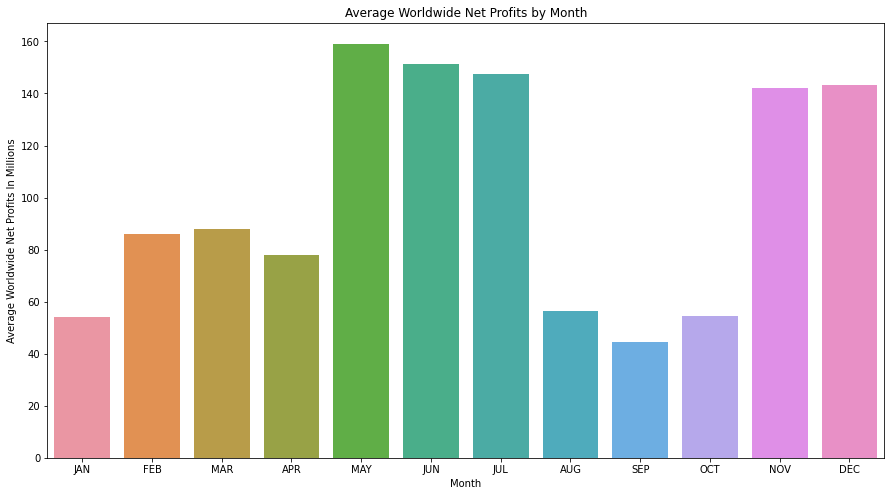

In [16]:
plt.figure(figsize=(15,8))
w = sns.barplot(data=releasedates2010, x="month", y="worldwideprofits_inmillions", ci=None)
w.set_xticklabels(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
w.set(xlabel='Month',
       ylabel='Average Worldwide Net Profits In Millions',
       title='Average Worldwide Net Profits by Month')

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Average Domestic Net Profits In Millions'),
 Text(0.5, 1.0, 'Average Domestic Net Profits by Month')]

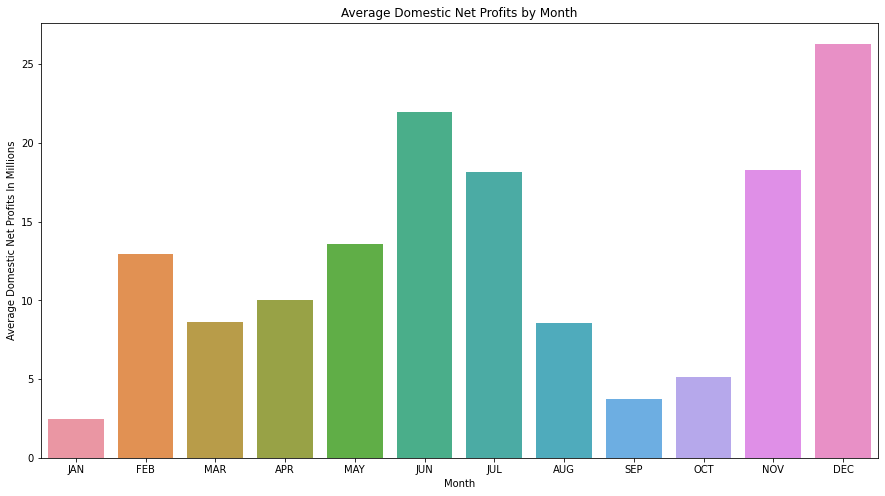

In [17]:
plt.figure(figsize=(15,8))
d = sns.barplot(data=releasedates2010, x="month", y="domesticprofits_inmillions", ci=None)
d.set_xticklabels(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
d.set(xlabel='Month',
       ylabel='Average Domestic Net Profits In Millions',
       title='Average Domestic Net Profits by Month')

In [18]:
releasedates2010_d = releasedates2010.drop(columns=["worldwideprofits_inmillions", "months"])
releasedates2010_d["type"] = "domestic"
releasedates2010_d["profits"] = releasedates2010_d["domesticprofits_inmillions"]
releasedates2010_d = releasedates2010_d.drop(columns="domesticprofits_inmillions")

releasedates2010_w = releasedates2010.drop(columns=["domesticprofits_inmillions", "months"])
releasedates2010_w["type"] = "worldwide"
releasedates2010_w["profits"] = releasedates2010_w["worldwideprofits_inmillions"]
releasedates2010_w=releasedates2010_w.drop(columns="worldwideprofits_inmillions")

In [19]:
f = pd.concat([releasedates2010_d , releasedates2010_w])

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Average Net Profits In Millions'),
 Text(0.5, 1.0, 'Average Profits by Month')]

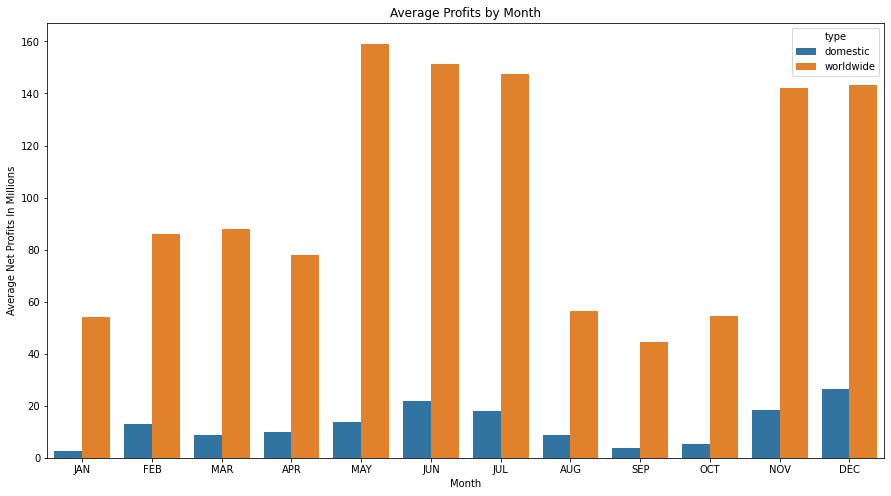

In [20]:
plt.figure(figsize=(15,8))
d = sns.barplot(data=f, x="month", y="profits", hue = "type", ci=None)
d.set_xticklabels(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
d.set(xlabel='Month',
       ylabel='Average Net Profits In Millions',
       title='Average Profits by Month')

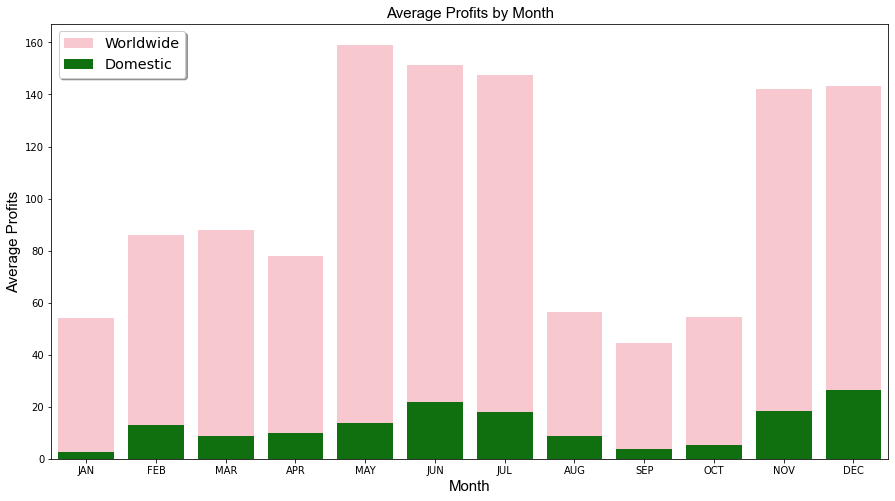

In [22]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=releasedates2010_w["month"], y=releasedates2010_w["profits"], color='pink', label='Worldwide', ci = None)
ax = sns.barplot(x=releasedates2010_d["month"], y=releasedates2010_d["profits"], color='green', label= 'Domestic', ci = None)
ax.set_xlabel('Month', fontfamily = 'Arial', fontsize = 15)
ax.set_ylabel('Average Profits', fontfamily = 'Arial', fontsize = 15)
ax.set_title('Average Profits by Month', fontfamily = 'Arial', fontsize = 15)
ax.set_xticklabels(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

CONCLUSION: RELEASE MOVIES IN MAY, JUNE, JULY, NOV, DEC

THIS IS TO DETERMINE RELATIONSHIP BETWEEN RUNTIMES AND GROSS

In [26]:
movie_totals = pd.merge(movie_gross, basics, left_on = "movie", right_on = "primary_title", how = "outer")
movie_totals

,id,release_date,movie,worldwidegross_inmillions,domesticgross_inmillions,productionbudget_inmillions,worldwideprofits_inmillions,domesticprofits_inmillions,year,primary_title,runtime_minutes,genres
0,1.0,"Dec 18, 2009",Avatar,2776.345279,760.507625,425.0,2351.345279,335.507625,2009.0,Avatar,93.0,Horror
1,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,1045.663875,241.063875,410.6,635.063875,-169.536125,2011.0,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy"
2,3.0,"Jun 7, 2019",Dark Phoenix,149.762350,42.762350,350.0,-200.237650,-307.237650,2019.0,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi"
3,4.0,"May 1, 2015",Avengers: Age of Ultron,1403.013963,459.005868,330.6,1072.413963,128.405868,2015.0,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi"
4,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,1316.721747,620.181382,317.0,999.721747,303.181382,2017.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
149476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kuambil Lagi Hatiku,123.0,Drama
149477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,Documentary
149478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dankyavar Danka,NaN,Comedy
149479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 Gunn,116.0,None


In [27]:
movietotals_2010 = movie_totals.loc[movie_totals["year"] > 2010]

In [28]:
runtimes2010=movietotals_2010.drop(columns = ["id", "release_date", "movie", "worldwidegross_inmillions", 
                                              "domesticgross_inmillions", "productionbudget_inmillions", 
                                              "primary_title", "genres"])
runtimes2010=runtimes2010.dropna()
runtimes2010.groupby("runtime_minutes").mean()

,worldwideprofits_inmillions,domesticprofits_inmillions,year
runtime_minutes,,,
3.0,125.407583,28.145040,2012.666667
4.0,148.565978,21.924371,2015.000000
5.0,58.493159,9.660902,2015.000000
6.0,-0.645164,-0.768262,2016.000000
7.0,116.612261,3.998844,2015.500000
...,...,...,...
172.0,8.198387,-45.429887,2012.500000
176.0,-3.393334,-6.152461,2012.000000
180.0,289.870414,16.900694,2013.000000


In [29]:
runtimes2010_d = runtimes2010.drop(columns=["worldwideprofits_inmillions"])
runtimes2010_d["type"] = "domestic"
runtimes2010_d["profits"] = runtimes2010_d["domesticprofits_inmillions"]
runtimes2010_d = runtimes2010_d.drop(columns="domesticprofits_inmillions")

runtimes2010_w = runtimes2010.drop(columns=["domesticprofits_inmillions"])
runtimes2010_w["type"] = "worldwide"
runtimes2010_w["profits"] = runtimes2010_w["worldwideprofits_inmillions"]
runtimes2010_w = runtimes2010_w.drop(columns="worldwideprofits_inmillions")

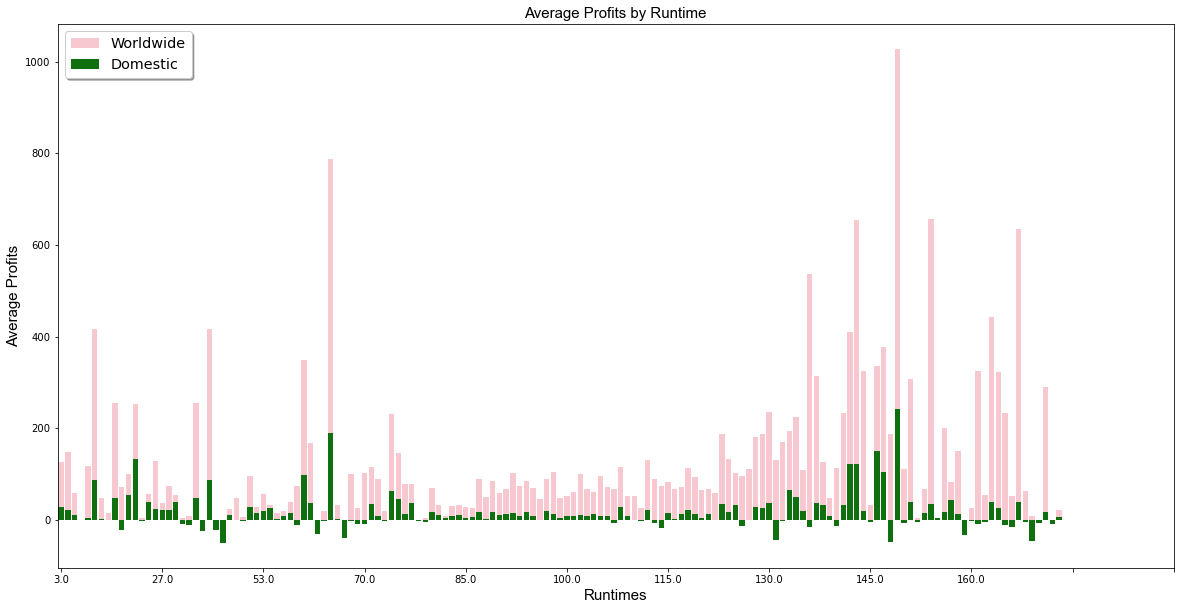

In [48]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=runtimes2010_w["runtime_minutes"], y=runtimes2010_w["profits"], color='pink', label='Worldwide', ci = None)
ax = sns.barplot(x=runtimes2010_d["runtime_minutes"], y=runtimes2010_d["profits"], color='green', label= 'Domestic', ci = None)
ax.set_xlabel('Runtimes', fontfamily = 'Arial', fontsize = 15)
ax.set_ylabel('Average Profits', fontfamily = 'Arial', fontsize = 15)
ax.set_title('Average Profits by Runtime', fontfamily = 'Arial', fontsize = 15)
ax.set_xticks(range(0, 175, 15))
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

THIS IS TO DETERMINE RELATIONSHIP BETWEEN GENRES AND GROSS

In [172]:
genres=movietotals_2010.drop(columns = ["id", "movie", "worldwidegross_inmillions", "domesticgross_inmillions",
                                        "productionbudget_inmillions", "year", "primary_title", "release_date", 
                                        "runtime_minutes"])
genres=genres.dropna()

In [173]:
genres

,worldwideprofits_inmillions,domesticprofits_inmillions,genres
1,635.063875,-169.536125,"Action,Adventure,Fantasy"
2,-200.237650,-307.237650,"Action,Adventure,Sci-Fi"
3,1072.413963,128.405868,"Action,Adventure,Sci-Fi"
6,1748.134200,378.815482,"Action,Adventure,Sci-Fi"
8,355.945209,-70.975705,"Action,Adventure,Fantasy"
...,...,...,...
6420,0.114822,0.114822,Drama
6426,-0.023453,-0.023453,Drama
6427,-0.023453,-0.023453,Drama
6428,-0.023453,-0.023453,Documentary


In [174]:
genres["genres"] = genres["genres"].apply(lambda x: str(x).split(","))
genres

,worldwideprofits_inmillions,domesticprofits_inmillions,genres
1,635.063875,-169.536125,"[Action, Adventure, Fantasy]"
2,-200.237650,-307.237650,"[Action, Adventure, Sci-Fi]"
3,1072.413963,128.405868,"[Action, Adventure, Sci-Fi]"
6,1748.134200,378.815482,"[Action, Adventure, Sci-Fi]"
8,355.945209,-70.975705,"[Action, Adventure, Fantasy]"
...,...,...,...
6420,0.114822,0.114822,[Drama]
6426,-0.023453,-0.023453,[Drama]
6427,-0.023453,-0.023453,[Drama]
6428,-0.023453,-0.023453,[Documentary]


In [176]:
new_genres = genres.explode('genres')

In [177]:
new_genres

,worldwideprofits_inmillions,domesticprofits_inmillions,genres
1,635.063875,-169.536125,Action
1,635.063875,-169.536125,Adventure
1,635.063875,-169.536125,Fantasy
2,-200.237650,-307.237650,Action
2,-200.237650,-307.237650,Adventure
...,...,...,...
6426,-0.023453,-0.023453,Drama
6427,-0.023453,-0.023453,Drama
6428,-0.023453,-0.023453,Documentary
6444,-0.004416,-0.004416,Comedy


In [178]:
new_genres.groupby("genres").mean()

,worldwideprofits_inmillions,domesticprofits_inmillions
genres,,
Action,162.304024,7.409913
Adventure,237.313698,15.343855
Animation,268.640261,37.159958
Biography,55.906682,12.992333
Comedy,92.299189,18.591621
Crime,52.090749,4.777706
Documentary,62.334890,12.313024
Drama,50.101133,7.750585
Family,147.944817,19.989384


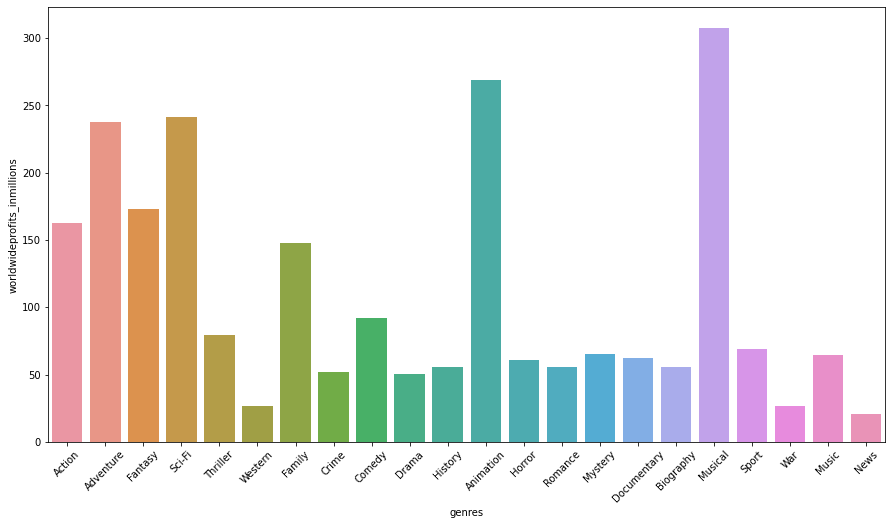

In [181]:
plt.figure(figsize=(15,8))
sns.barplot(data=new_genres, x="genres", y="worldwideprofits_inmillions", ci=None)
w.set(xlabel='Genre',
       ylabel='Average Worldwide Net Profits In Millions',
       title='Average Worldwide Net Profits by Genre')
plt.xticks(rotation=45)

plt.show()

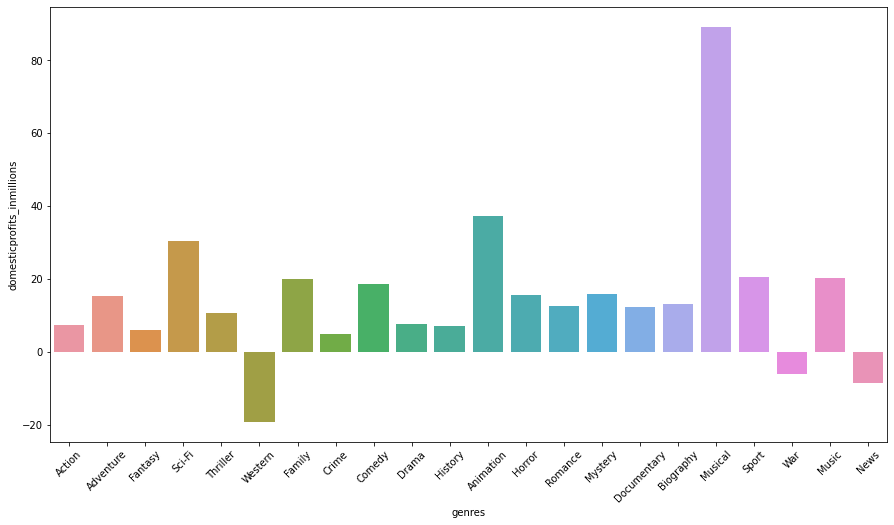

In [182]:
plt.figure(figsize=(15,8))
sns.barplot(data=new_genres, x="genres", y="domesticprofits_inmillions", ci=None)
w.set(xlabel='Genre',
       ylabel='Average Domestic Net Profits In Millions',
       title='Average Domestic Net Profits by Genre')
plt.xticks(rotation=45)

plt.show()

In [135]:
genres_d = genres.drop(columns=["worldwideprofits_inmillions"])
genres_d["type"] = "domestic"
genres_d["profits"] = genres_d["domesticprofits_inmillions"]
genres_d = genres_d.drop(columns="domesticprofits_inmillions")

genres_w = genres.drop(columns=["domesticprofits_inmillions"])
genres_w["type"] = "worldwide"
genres_w["profits"] = genres_w["worldwideprofits_inmillions"]
genres_w = genres_w.drop(columns="worldwideprofits_inmillions")

In [185]:
genres_concat = pd.concat([genres_d , genres_w])
genres_concat.sort_values(by=["profits"], ascending=False)

,genres,type,profits
6,"Action,Adventure,Sci-Fi",worldwide,1748.134200
34,"Action,Adventure,Sci-Fi",worldwide,1433.854864
82,"Action,Crime,Thriller",worldwide,1328.722794
26,"Action,Adventure,Sci-Fi",worldwide,1292.935897
53,"Action,Adventure,Sci-Fi",worldwide,1148.258224
...,...,...,...
1,"Action,Adventure,Fantasy",domestic,-169.536125
12,"Action,Adventure,Western",domestic,-185.697885
2,"Action,Adventure,Sci-Fi",worldwide,-200.237650
13,"Action,Adventure,Sci-Fi",domestic,-201.941321


In [191]:
genres_w = genres_w.groupby("genres").mean()
genres_w = genres_w.sort_values(by=["profits"], ascending=False)
genres_w.head(10)

,profits
genres,
"Fantasy,Romance",1122.469910
"Adventure,Drama,Sport",1122.469910
"Family,Fantasy,Musical",1099.199706
Sci-Fi,671.133378
"Documentary,Drama,Sport",671.133378
"Adventure,Drama,Sci-Fi",524.325409
"Action,Adventure,Sci-Fi",480.327747
"Adventure,Fantasy",469.544026
Musical,439.551353


In [192]:
genres_d = genres_d.groupby("genres").mean()
genres_d = genres_d.sort_values(by=["profits"], ascending=False)
genres_d.head(10)

,profits
genres,
"Family,Fantasy,Musical",344.014165
"Documentary,Drama,Sport",262.563408
Sci-Fi,262.563408
"Fantasy,Romance",250.738009
"Adventure,Drama,Sport",250.738009
"Comedy,Romance,Sport",133.141585
"Drama,Family,Fantasy",106.151353
Musical,106.151353
"Biography,Documentary,History",104.261625


PRODUCTION BUDGET

In [234]:
production = moviegross_2010.drop(columns = ["id", "release_date", "movie", "worldwidegross_inmillions", 
                                             "domesticgross_inmillions", "year"])
production = production.sort_values(by=["productionbudget_inmillions"], ascending = False)

In [245]:
production["worldwide_ROI"] = production["worldwideprofits_inmillions"]/production["productionbudget_inmillions"]
production["domestic_ROI"] = production["domesticprofits_inmillions"]/production["productionbudget_inmillions"]

In [254]:
production_positiveworld = production.loc[production["worldwide_ROI"] > 0].drop(columns=["domesticprofits_inmillions", "domestic_ROI"])
production_positivedomestic = production.loc[production["domestic_ROI"] > 0].drop(columns=["worldwideprofits_inmillions", "worldwide_ROI"])

In [260]:
production_positiveworld=production_positiveworld.sort_values(by=['worldwideprofits_inmillions'], ascending=False)

In [262]:
production_positivedomestic=production_positivedomestic.sort_values(by=['domesticprofits_inmillions'], ascending=False)

In [264]:
production_positivedomestic

,productionbudget_inmillions,domesticprofits_inmillions,domestic_ROI
5,306.00,630.662225,2.060988
41,200.00,500.059566,2.500298
33,215.00,437.270625,2.033817
43,200.00,408.581744,2.042909
26,225.00,398.279547,1.770131
...,...,...,...
4720,3.00,0.127773,0.042591
5737,0.03,0.114822,3.827400
5044,1.70,0.077043,0.045319
5567,0.27,0.049285,0.182537


In [236]:
production_d = production.drop(columns=["worldwideprofits_inmillions"])
production_d["type"] = "domestic"
production_d["profits"] = production_d["domesticprofits_inmillions"]
production_d = production_d.drop(columns="domesticprofits_inmillions")

production_w = production.drop(columns=["domesticprofits_inmillions"])
production_w["type"] = "worldwide"
production_w["profits"] = production_w["worldwideprofits_inmillions"]
production_w = production_w.drop(columns="worldwideprofits_inmillions")

In [242]:
production_w

,productionbudget_inmillions,type,profits
1,410.600,worldwide,635.063875
2,350.000,worldwide,-200.237650
3,330.600,worldwide,1072.413963
4,317.000,worldwide,999.721747
5,306.000,worldwide,1747.311220
...,...,...,...
5719,0.050,worldwide,-0.041626
5731,0.040,worldwide,-0.036368
5737,0.030,worldwide,0.114822
5744,0.027,worldwide,-0.023453


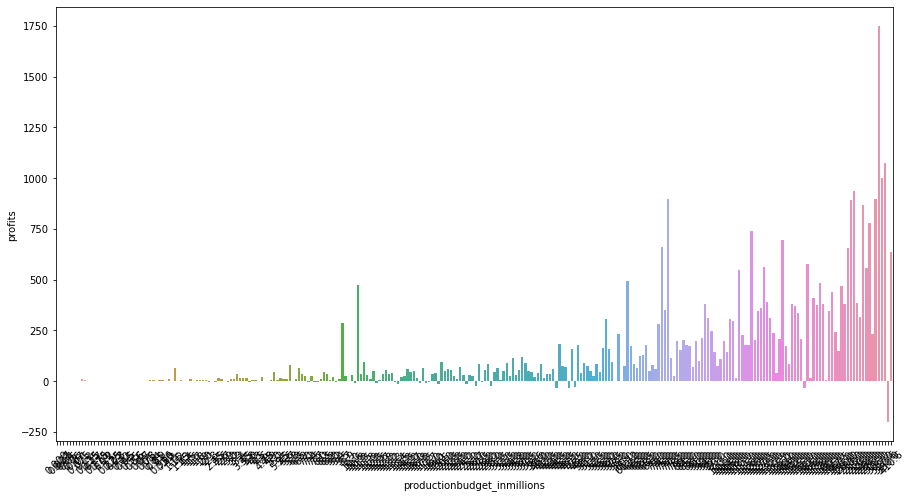

In [239]:
plt.figure(figsize=(15,8))
sns.barplot(data=production_w, x="productionbudget_inmillions", y="profits", ci=None)
w.set(xlabel='Production Budget In Millions',
       ylabel='Average Worldwide Net Profits In Millions',
       title='Average Worldwide Net Profits Against Production Budget')
plt.xticks(rotation=45)

plt.show()

OTHER STUFF

In [13]:
movie_totals_clean = movie_totals.dropna()
movie_totals_clean



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,runtime_minutes,genres
0,1.0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Avatar,93.0,Horror
1,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy"
2,3.0,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi"
3,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi"
6,7.0,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...
6427,45.0,"Jan 27, 2017",Emily,27000.0,3547.0,3.547000e+03,Emily,83.0,Drama
6428,45.0,"Jan 27, 2017",Emily,27000.0,3547.0,3.547000e+03,Emily,26.0,Documentary
6438,67.0,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,Clean,70.0,"Comedy,Drama,Horror"
6439,68.0,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,Cure,93.0,Drama
